<a href="https://colab.research.google.com/github/kushbajpai/Image-Generation-Models/blob/main/Gen_AI_Stable_Diffusion_Bala_Krishna_Ragala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diffusers

This notebook provides a comprehensive tutorial for using the Hugging Face Diffusers library in Google Colab.

## 1\. Setup and Installations

First, let's install all the necessary libraries. This step needs to be run every time you start a new Colab session.

In [1]:
# @title Install Libraries
!pip install diffusers transformers accelerate scipy safetensors
!pip install invisible_watermark # Recommended for some Stable Diffusion models
!pip install Pillow # For image handling
!pip install requests # For downloading example images
!pip install matplotlib # For displaying images in Colab

print("All necessary libraries installed!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.0 MB/s eta 0:00:00
All necessary libraries installed!


## 2\. Basic Image Generation (Text-to-Image)

We'll start with the most common use case: generating images from text prompts using Stable Diffusion.

In [ ]:
# Set up and initialize the Stable Diffusion pipeline
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained('stabilityai/stable-diffusion-2-1', torch_dtype=torch.float16)
pipe = pipe.to('cuda')

KeyboardInterrupt: 

In [ ]:
# @title Load Stable Diffusion Pipeline
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt
from PIL import Image

# Check if CUDA is available, otherwise use CPU
# Colab typically provides a GPU if you select 'GPU' runtime type
device = "cuda" if torch.cuda.is_available() else "cpu"

if device == "cuda":
    print("Using NVIDIA GPU (CUDA)")
    # For Colab, often float16 is preferred for speed and memory efficiency on GPUs
    torch_dtype = torch.float16
else:
    print("Using CPU (inference will be much slower)")
    torch_dtype = torch.float32

model_id = "runwayml/stable-diffusion-v1-5" # A widely used Stable Diffusion model

# Load the pipeline
# This will download the model weights (approx. 2-7 GB depending on the model)
# Make sure you have enough disk space.
print(f"Loading pipeline for '{model_id}' on device: {device} with dtype: {torch_dtype}")
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch_dtype)
pipe = pipe.to(device)

print(f"Pipeline loaded successfully on {device}.")

Using NVIDIA GPU (CUDA)
Loading pipeline for 'runwayml/stable-diffusion-v1-5' on device: cuda with dtype: torch.float16


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

### 2.1 Generate Your First Image

Generating image for prompt: 'A majestic lion standing in a savanna at sunset, detailed, vibrant colors, photorealistic'


  0%|          | 0/50 [00:00<?, ?it/s]

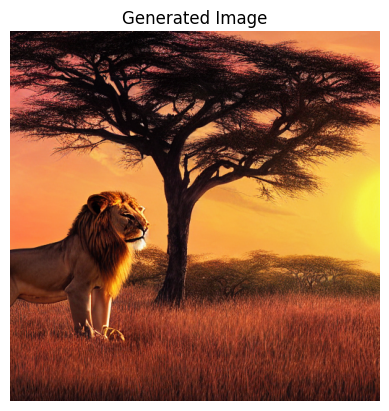

Image saved as lion_sunset.png


In [ ]:
# @title Generate Image from Prompt
prompt = "A majestic lion standing in a savanna at sunset, detailed, vibrant colors, photorealistic"
print(f"Generating image for prompt: '{prompt}'")
image = pipe(prompt).images[0]

# Display the image directly in Colab
plt.imshow(image)
plt.axis('off') # Hide axes
plt.title("Generated Image")
plt.show()

# Save the image
image_path = "lion_sunset.png"
image.save(image_path)
print(f"Image saved as {image_path}")

## 4\. Understanding Pipelines and Schedulers

### 4.1 What is a Pipeline?

As mentioned, a Pipeline is a high-level abstraction that encapsulates the entire diffusion process for a specific task. It combines:

- UNet model: The core diffusion model responsible for denoising.
- VAE (Variational AutoEncoder): Used to encode images into a latent space and decode them back.
- Text Encoder (e.g., CLIP): For text-to-image, it converts your prompt into numerical embeddings.
- Scheduler: Defines the noise schedule and sampling algorithm.
- Tokenizer: Used by the text encoder.

This modularity allows you to swap components easily.

### 4.2 What is a Scheduler?

The Scheduler is crucial. It dictates how the noise is removed over a series of steps. Different schedulers implement different algorithms, leading to variations in generation speed, quality, and aesthetic.

Common schedulers include:

- PNDMScheduler
- DPMSolverMultistepScheduler (often faster and high-quality)
- EulerDiscreteScheduler
- DDIMScheduler
- LMSDiscreteScheduler

### 4.3 Changing Schedulers

Let's change the default scheduler to `DPMSolverMultistepScheduler`, which often yields good results quickly.

Default scheduler: PNDMScheduler
New scheduler: DPMSolverMultistepScheduler
Generating image with new scheduler for prompt: 'A watercolor painting of a serene Japanese garden with cherry blossoms'


  0%|          | 0/50 [00:00<?, ?it/s]

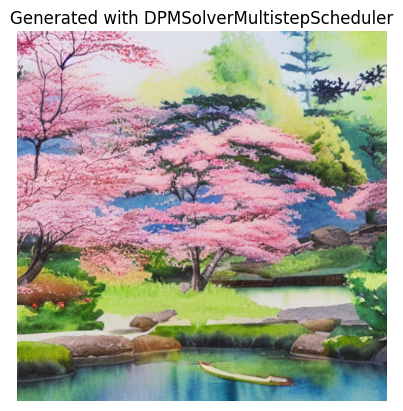

Image saved as japanese_garden_dpm.png


In [ ]:
# @title Change Scheduler
from diffusers import DPMSolverMultistepScheduler

print(f"Default scheduler: {pipe.scheduler.__class__.__name__}")

# Change to DPMSolverMultistepScheduler
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
print(f"New scheduler: {pipe.scheduler.__class__.__name__}")

# Generate an image with the new scheduler
prompt_new_scheduler = "A watercolor painting of a serene Japanese garden with cherry blossoms"
print(f"Generating image with new scheduler for prompt: '{prompt_new_scheduler}'")
image_new_scheduler = pipe(prompt_new_scheduler).images[0]

plt.imshow(image_new_scheduler)
plt.axis('off')
plt.title("Generated with DPMSolverMultistepScheduler")
plt.show()

image_new_scheduler.save("japanese_garden_dpm.png")
print("Image saved as japanese_garden_dpm.png")

## 5\. Controlling Generation Parameters

Fine-tune your image generation with these key parameters.

### 5.1 `num_inference_steps`

More steps mean higher quality but longer generation time.

Generating images for prompt: 'A futuristic robot walking in a cyberpunk street, highly detailed' with different inference steps.
Generating with 20 steps...


  0%|          | 0/20 [00:00<?, ?it/s]

Generated with 20 steps. Saved as robot_20_steps.png
Generating with 50 steps...


  0%|          | 0/50 [00:00<?, ?it/s]

Generated with 50 steps. Saved as robot_50_steps.png


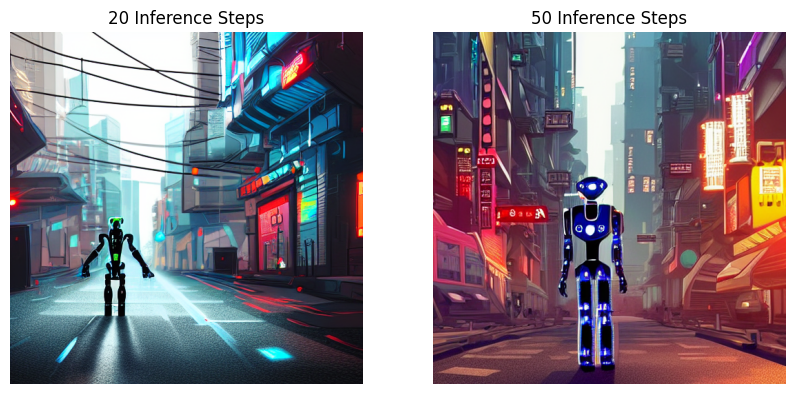

In [ ]:
# @title Control `num_inference_steps`
prompt_steps = "A futuristic robot walking in a cyberpunk street, highly detailed"
print(f"Generating images for prompt: '{prompt_steps}' with different inference steps.")

# Generate with 20 steps
print("Generating with 20 steps...")
image_20_steps = pipe(prompt_steps, num_inference_steps=20).images[0]
image_20_steps.save("robot_20_steps.png")
print("Generated with 20 steps. Saved as robot_20_steps.png")

# Generate with 50 steps
print("Generating with 50 steps...")
image_50_steps = pipe(prompt_steps, num_inference_steps=50).images[0]
image_50_steps.save("robot_50_steps.png")
print("Generated with 50 steps. Saved as robot_50_steps.png")

# Display for comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_20_steps)
plt.axis('off')
plt.title("20 Inference Steps")

plt.subplot(1, 2, 2)
plt.imshow(image_50_steps)
plt.axis('off')
plt.title("50 Inference Steps")
plt.show()

### 5.2 `guidance_scale` (CFG Scale)

Controls how strongly the image adheres to the prompt.

Generating images for prompt: 'A photorealistic portrait of an old wizard, long white beard, mystical aura' with different guidance scales.
Generating with guidance_scale=4...


  0%|          | 0/50 [00:00<?, ?it/s]

Generated with guidance_scale=4. Saved as wizard_gs_4.png
Generating with guidance_scale=12...


  0%|          | 0/50 [00:00<?, ?it/s]

Generated with guidance_scale=12. Saved as wizard_gs_12.png


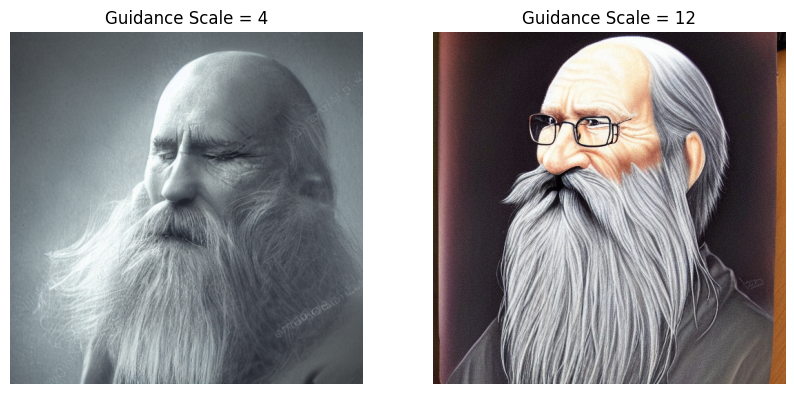

In [ ]:
# @title Control `guidance_scale`
prompt_guidance = "A photorealistic portrait of an old wizard, long white beard, mystical aura"
print(f"Generating images for prompt: '{prompt_guidance}' with different guidance scales.")

# Generate with low guidance_scale
print("Generating with guidance_scale=4...")
image_gs_4 = pipe(prompt_guidance, guidance_scale=4).images[0]
image_gs_4.save("wizard_gs_4.png")
print("Generated with guidance_scale=4. Saved as wizard_gs_4.png")

# Generate with high guidance_scale
print("Generating with guidance_scale=12...")
image_gs_12 = pipe(prompt_guidance, guidance_scale=12).images[0]
image_gs_12.save("wizard_gs_12.png")
print("Generated with guidance_scale=12. Saved as wizard_gs_12.png")

# Display for comparison
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_gs_4)
plt.axis('off')
plt.title("Guidance Scale = 4")

plt.subplot(1, 2, 2)
plt.imshow(image_gs_12)
plt.axis('off')
plt.title("Guidance Scale = 12")
plt.show()

### 5.3 `seed` for Reproducibility

Ensures you can regenerate the exact same image.

Current scheduler for seed testing: EulerDiscreteScheduler
Generating images for prompt: 'A cozy living room with a fireplace and a cat sleeping on a rug' with different seeds.
Generating with seed: 42 (Attempt A)


  0%|          | 0/50 [00:00<?, ?it/s]

Generating with seed: 42 (Attempt B)


  0%|          | 0/50 [00:00<?, ?it/s]

Generating with seed: 123


  0%|          | 0/50 [00:00<?, ?it/s]


Check the saved images:
  cozy_room_seed_42_a.png and cozy_room_seed_42_b.png should be identical.
  cozy_room_seed_123.png should be different.


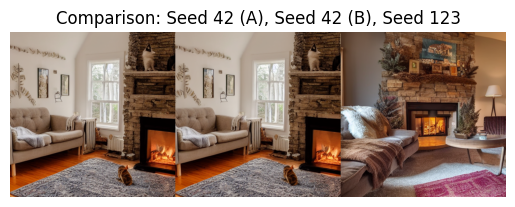

In [ ]:
# @title Use `seed` for Reproducibility
from diffusers import EulerDiscreteScheduler
from diffusers.utils import make_image_grid
import random

# Ensure the pipeline is using a deterministic scheduler for better reproducibility.
# EulerDiscreteScheduler is often good for this.
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config)
print(f"Current scheduler for seed testing: {pipe.scheduler.__class__.__name__}")

prompt_seed = "A cozy living room with a fireplace and a cat sleeping on a rug"
print(f"Generating images for prompt: '{prompt_seed}' with different seeds.")

# Generate with a fixed seed (42)
fixed_seed = 42
print(f"Generating with seed: {fixed_seed} (Attempt A)")
generator_1 = torch.Generator(device=device).manual_seed(fixed_seed)
image_seed_42_a = pipe(prompt_seed, generator=generator_1).images[0]
image_seed_42_a.save("cozy_room_seed_42_a.png")

print(f"Generating with seed: {fixed_seed} (Attempt B)")
generator_2 = torch.Generator(device=device).manual_seed(fixed_seed) # Same seed
image_seed_42_b = pipe(prompt_seed, generator=generator_2).images[0]
image_seed_42_b.save("cozy_room_seed_42_b.png")

# Generate with a different seed (123)
diff_seed = 123
print(f"Generating with seed: {diff_seed}")
generator_3 = torch.Generator(device=device).manual_seed(diff_seed)
image_seed_123 = pipe(prompt_seed, generator=generator_3).images[0]
image_seed_123.save("cozy_room_seed_123.png")

print("\nCheck the saved images:")
print("  cozy_room_seed_42_a.png and cozy_room_seed_42_b.png should be identical.")
print("  cozy_room_seed_123.png should be different.")

# Displaying images for comparison
grid = make_image_grid([image_seed_42_a, image_seed_42_b, image_seed_123], rows=1, cols=3)
plt.imshow(grid)
plt.axis('off')
plt.title(f"Comparison: Seed {fixed_seed} (A), Seed {fixed_seed} (B), Seed {diff_seed}")
plt.show()

## 6\. Image-to-Image Generation

Transform an existing image based on a new text prompt.

Loading Image-to-Image pipeline...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Image-to-Image pipeline loaded.
Example image loaded successfully.
Transforming image with prompt: 'A fantasy landscape, with a castle on a hill, flying dragons, majestic'


  0%|          | 0/37 [00:00<?, ?it/s]

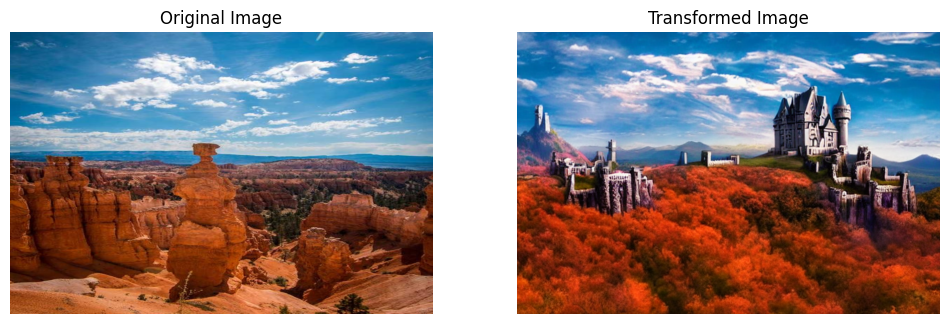

Image-to-image transformation complete. Saved as transformed_fantasy_landscape.png


In [ ]:
# @title Image-to-Image Generation
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image
import requests
from io import BytesIO

# Load the image-to-image pipeline
print("Loading Image-to-Image pipeline...")
img2img_pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, torch_dtype=torch_dtype)
img2img_pipe = img2img_pipe.to(device)
print("Image-to-Image pipeline loaded.")

# Load an example image from a URL
print("Downloading example image...")
try:
    url = "https://picsum.photos/600/800"
    response = requests.get(url)
    init_image = Image.open(BytesIO(response.content)).convert("RGB")
    init_image = init_image.resize((768, 512)) # Resize to a common stable diffusion size
    print("Example image loaded successfully.")
except Exception as e:
    print(f"Could not load example image from URL. Error: {e}")
    print("Creating a dummy white image instead.")
    init_image = Image.new('RGB', (768, 512), (255, 255, 255))

prompt_img2img = "A fantasy landscape, with a castle on a hill, flying dragons, majestic"
print(f"Transforming image with prompt: '{prompt_img2img}'")

# `strength` controls how much the image is transformed.
# A higher strength means more transformation (more noise added and denoised).
image_transformed = img2img_pipe(
    prompt=prompt_img2img,
    image=init_image,
    strength=0.75, # How much to transform the image
    guidance_scale=7.5
).images[0]

# Display original and transformed
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(init_image)
plt.axis('off')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(image_transformed)
plt.axis('off')
plt.title("Transformed Image")
plt.show()

image_transformed.save("transformed_fantasy_landscape.png")
print("Image-to-image transformation complete. Saved as transformed_fantasy_landscape.png")

## 7\. Inpainting

Fill in or replace specific areas of an image. This requires an original image and a mask.

Loading inpainting pipeline for 'runwayml/stable-diffusion-inpainting'...


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


Inpainting pipeline loaded.
Inpainting example images loaded successfully.
Inpainting with prompt: 'A playful golden retriever sitting on the sofa'


  0%|          | 0/50 [00:00<?, ?it/s]

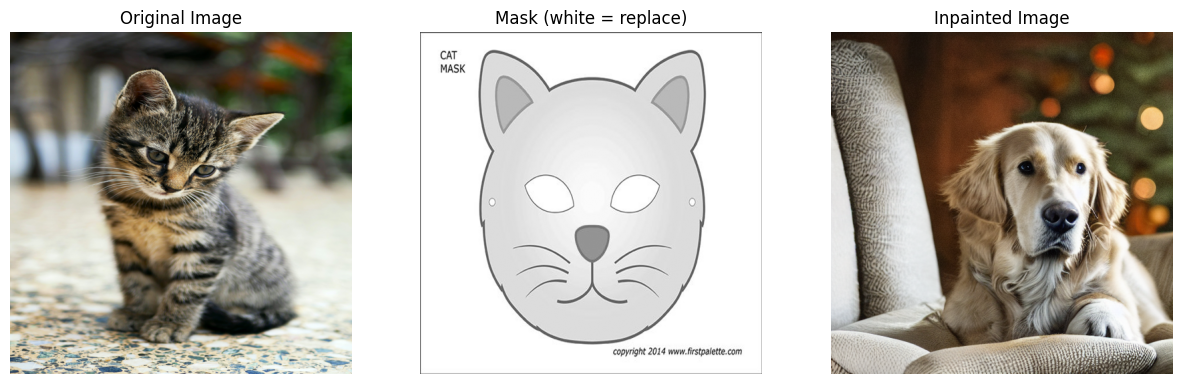

Image inpainting complete. Saved as cat_to_dog_inpainted.png


In [ ]:
# @title Inpainting
from diffusers import StableDiffusionInpaintPipeline
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Load the inpainting pipeline (using a model specifically for inpainting)
model_id_inpainting = "runwayml/stable-diffusion-inpainting"
print(f"Loading inpainting pipeline for '{model_id_inpainting}'...")
try:
    inpaint_pipe = StableDiffusionInpaintPipeline.from_pretrained(
        model_id_inpainting,
        torch_dtype=torch_dtype
    )
    inpaint_pipe = inpaint_pipe.to(device)
    print("Inpainting pipeline loaded.")
except Exception as e:
    print(f"Could not load inpainting model '{model_id_inpainting}'. Error: {e}")
    print("Please check model availability or if you have enough VRAM.")
    print("Skipping inpainting example.")
    inpaint_pipe = None

if inpaint_pipe:
    # Load original image and mask
    print("Downloading inpainting example images (cat and mask)...")
    img_url = "https://images.unsplash.com/photo-1529778873920-4da4926a72c2?fm=jpg&q=60&w=3000&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mnx8Y3V0ZSUyMGNhdHxlbnwwfHwwfHx8MA%3D%3D"
    mask_url = "https://i.pinimg.com/736x/a4/fa/1a/a4fa1a077577a64583a5148dc1b1d711.jpg"

    try:
        init_image_inpaint = Image.open(BytesIO(requests.get(img_url).content)).convert("RGB")
        mask_image_inpaint = Image.open(BytesIO(requests.get(mask_url).content)).convert("L") # Mask should be grayscale
        print("Inpainting example images loaded successfully.")
    except Exception as e:
        print(f"Could not load inpainting example images from URLs. Error: {e}")
        print("Please ensure URLs are correct or provide local images.")
        init_image_inpaint = None
        mask_image_inpaint = None

    if init_image_inpaint and mask_image_inpaint:
        prompt_inpaint = "A playful golden retriever sitting on the sofa"
        print(f"Inpainting with prompt: '{prompt_inpaint}'")

        # Resize for Stable Diffusion if needed (usually 512x512 or 768x768)
        # Ensure both image and mask are the same size
        width, height = 512, 512
        init_image_inpaint = init_image_inpaint.resize((width, height))
        mask_image_inpaint = mask_image_inpaint.resize((width, height))

        image_inpainted = inpaint_pipe(
            prompt=prompt_inpaint,
            image=init_image_inpaint,
            mask_image=mask_image_inpaint,
            guidance_scale=7.5
        ).images[0]

        # Display original, mask, and inpainted
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(init_image_inpaint)
        plt.axis('off')
        plt.title("Original Image")

        plt.subplot(1, 3, 2)
        plt.imshow(mask_image_inpaint, cmap='gray')
        plt.axis('off')
        plt.title("Mask (white = replace)")

        plt.subplot(1, 3, 3)
        plt.imshow(image_inpainted)
        plt.axis('off')
        plt.title("Inpainted Image")
        plt.show()

        image_inpainted.save("cat_to_dog_inpainted.png")
        print("Image inpainting complete. Saved as cat_to_dog_inpainted.png")

<div class="md-recitation">
  Sources
  <ol>
  <li><a href="https://huggingface.co/CompVis/stable-diffusion-v1-4/discussions/66">https://huggingface.co/CompVis/stable-diffusion-v1-4/discussions/66</a></li>
  </ol>
</div>